Reading the Data

In [1]:
#read the dataset
path = "../data/"

In [ ]:
import os
from collections import Counter
names = [name.replace(' ', '_').split('_')[0] for name in os.listdir(path)]
classes=Counter(names) #returns dictionary

In [3]:
classes

Counter({'salvia': 7,
         'astragalus': 4,
         'brassica': 4,
         'salix': 4,
         'trifolium': 4,
         'acer': 3,
         'aster': 3,
         'echium': 3,
         'onobrychis': 3,
         'phlomis': 3,
         'scabiosa': 3,
         'acacia': 2,
         'anchusa': 2,
         'arbutus': 2,
         'bupleurum': 2,
         'carduus': 2,
         'centaurea': 2,
         'cistus': 2,
         'cucumis': 2,
         'diospyros': 2,
         'echinophora': 2,
         'echinops': 2,
         'erica': 2,
         'pinus': 2,
         'potentilla': 2,
         'prunus': 2,
         'rubus': 2,
         'sinapis': 2,
         'buddleja': 1,
         'carthamus': 1,
         'carum': 1,
         'castanea': 1,
         'citrus': 1,
         'clematis': 1,
         'cucurbita': 1,
         'diplotaxis': 1,
         'dipsacus': 1,
         'ecballium': 1,
         'elaeagnus': 1,
         'epilobium': 1,
         'eriobotrya': 1,
         'eruca': 1,
         'ery

In [ ]:
# no of images
print("number of images:",len(names))Total

number of images: 99


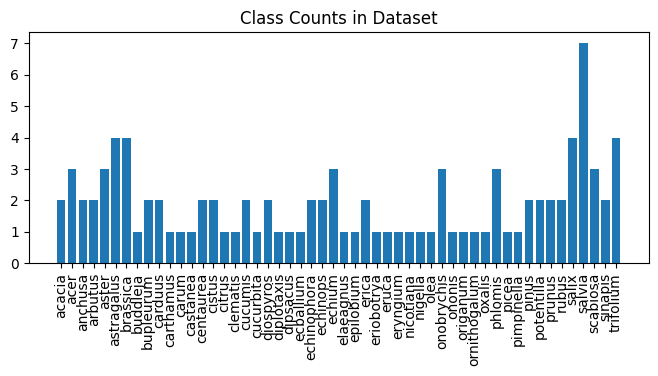

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize= (8,3))
plt.title('Class Counts in Dataset')
plt.bar(*zip(*classes.items()))
plt.xticks (rotation='vertical')
plt.show()

In [6]:
path_class = {key:[] for key in classes.keys()}
for name in os.listdir(path):
    key = name.replace(' ', '_').split('_')[0]
    path_class[key].append(path + name)
# print(path_class[key][0])  # Should be something like '../data/acacia_dealbata/image1.jpg'

In [7]:
path_class = {key: [] for key in classes.keys()}

for name in os.listdir(path):
    key = name.replace(' ', '_').split('_')[0]
    folder_path = os.path.join(path, name)

    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(folder_path, file)
                path_class[key].append(img_path)
# print(path_class[key][0])

IndexError: list index out of range

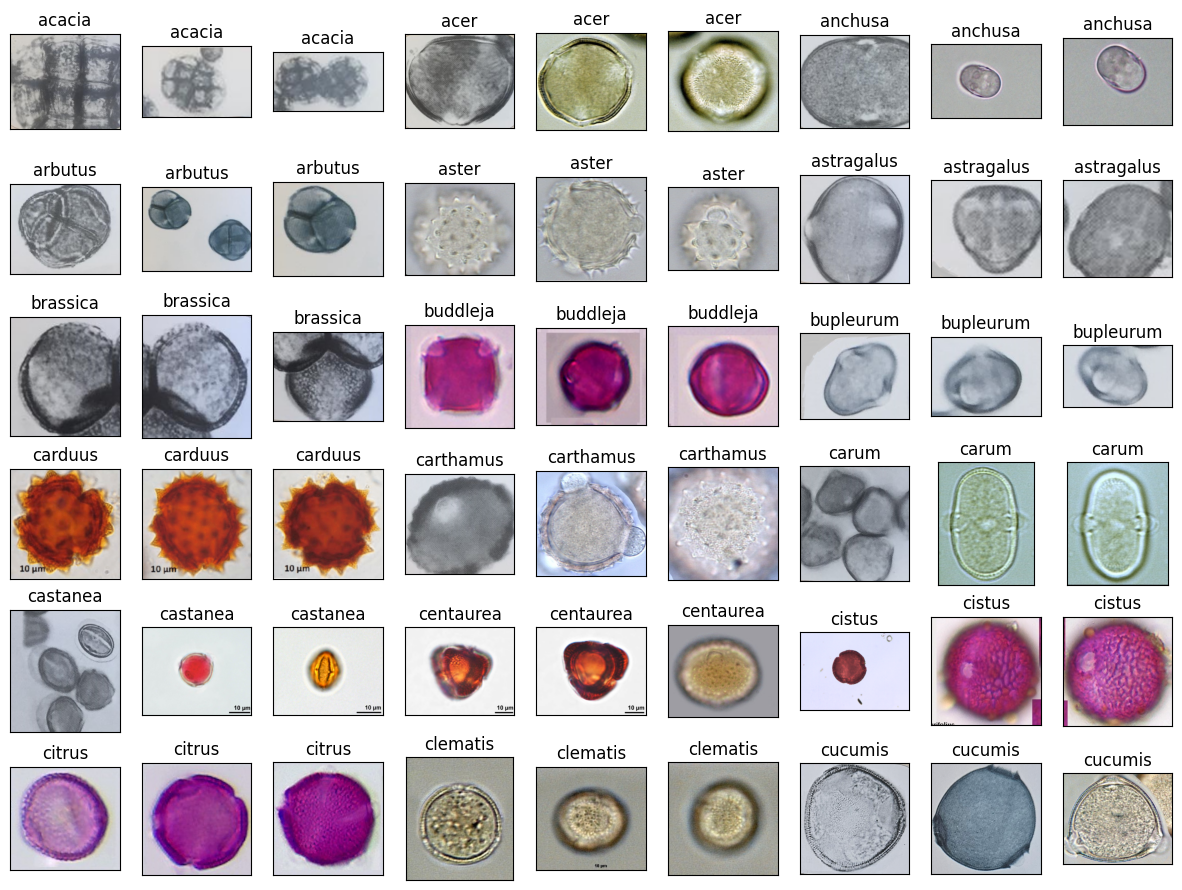

In [8]:
from PIL import Image
fig = plt.figure(figsize=(15, 15))
for i, key in enumerate (path_class.keys()):
    img1 =Image.open(path_class [key][0])
    img2 =Image.open(path_class [key][1])
    img3 =Image.open(path_class [key][2])
    ax =fig.add_subplot(8, 9, 3*i + 1 , xticks=[], yticks=[])
    ax.imshow(img1)
    ax.set_title(key)
    ax =fig.add_subplot(8, 9, 3*i + 2 , xticks=[], yticks=[])
    ax.imshow(img2)
    ax.set_title(key)
    ax =fig.add_subplot(8, 9, 3*i + 3 , xticks=[], yticks=[])
    ax.imshow(img3)
    ax.set_title(key)

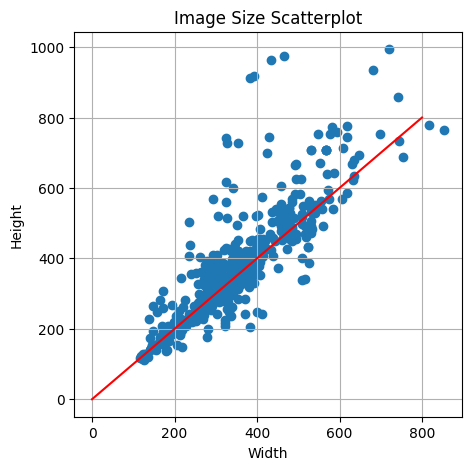

In [10]:
import cv2
path = '../data'  # root folder containing class subfolders
valid_exts = ('.jpg', '.jpeg', '.png')
size = []

# Traverse all subdirectories
for subfolder in os.listdir(path):
    subfolder_path = os.path.join(path, subfolder)

    if os.path.isdir(subfolder_path):
        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            if os.path.isfile(file_path) and file.lower().endswith(valid_exts):
                img = cv2.imread(file_path)
                if img is not None:
                    size.append(img.shape)

# Plot if any images were found
if size:
    x, y, _ = zip(*size)

    fig = plt.figure(figsize=(5, 5))
    plt.scatter(x, y)
    plt.title("Image Size Scatterplot")
    plt.plot([0, 800], [0, 800], 'r')  # diagonal red line
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.grid(True)
    plt.show()
else:
    print("No valid images found.")


Image Preprocessing

In [11]:
import numpy as np

def process_img(img, size=(128, 128)):
    img = cv2.resize(img, size)
    img = img / 255.0  # Normalize to 0-1
    return img

X, Y = [], []
path = '../data'  # or your actual root directory

valid_exts = ('.jpg', '.jpeg', '.png')

for subfolder in os.listdir(path):
    subfolder_path = os.path.join(path, subfolder)

    if os.path.isdir(subfolder_path):
        for name in os.listdir(subfolder_path):
            if name.lower().endswith(valid_exts):
                img_path = os.path.join(subfolder_path, name)
                img = cv2.imread(img_path)
                if img is not None:
                    X.append(process_img(img))
                    label = subfolder.split('_')[0]  # Use subfolder name as label
                    Y.append(label)
                else:
                    print(f"⚠️ Skipped unreadable image: {img_path}")

X = np.array(X)


In [ ]:
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Count number of samples per label
label_counts = Counter(Y)

# Keep only labels with at least 2 images
filtered_X = []
filtered_Y = []
for img, label in zip(X, Y):
    if label_counts[label] >= 2:
        filtered_X.append(img)
        filtered_Y.append(label)

# Convert to arrays
X = np.array(filtered_X)
Y = np.array(filtered_Y)

# Label encode
le = LabelEncoder()
Y_le = le.fit_transform(Y)

# One-hot encode
num_classes = len(np.unique(Y_le))
Y_cat = np.eye(num_classes)[Y_le]

# Now safe to do stratified split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y_cat, test_size=0.285, stratify=Y_le
)

print("Images in each class in Test set: {}".format(np.sum(Y_test, axis=0)))


Training the Model